##**Task 6:- Exploratory Data Analysis - Sports**
###**Author:- Harsh Bhatia**
Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’ and find out the most successful teams, players and factors contributing win or loss of a team and also Suggest teams or players a company should endorse for its products.

link to dataset:- https://bit.ly/34SRn3b



In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns
%matplotlib inline

# to avoid warnings during execution
from warnings import filterwarnings
filterwarnings('ignore') 

In [ ]:
#importing IPL dataset 
from google.colab import files
uploaded = files.upload()

#read data from link 
df1 = pd.read_csv(io.BytesIO(uploaded['deliveries.csv']))
df2 = pd.read_csv(io.BytesIO(uploaded['matches.csv']))


Saving deliveries.csv to deliveries (1).csv
Saving matches.csv to matches (1).csv


##**Preliminary Analysis**

In [ ]:
#first 5 entries in deliveries
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
df1.shape

(179078, 21)

In [ ]:
#first 5 entries in matches
df2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
df2.shape

(756, 18)

In [ ]:
#columns in deliveries and matches
df1.columns


Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
df2.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

###**Checking presence of null values**


In [ ]:
#in deliveries
df1.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [ ]:
#in matches
df2.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
#removing umpire3 because it has too many null values
df2.drop(['umpire3'],inplace=True,axis=1)

###**Analysing Number of matches in each season**


In [ ]:
ct=df2['season'].value_counts()
ct

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

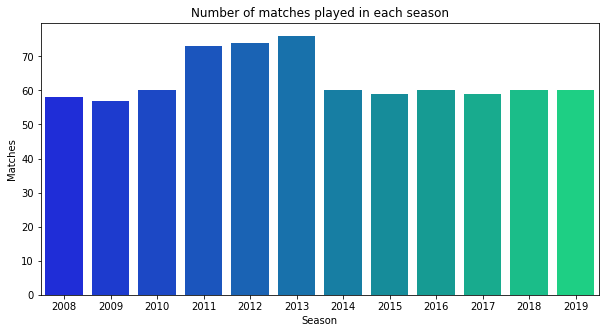

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot("season",data = df2,palette='winter',)
plt.title("Number of matches played in each season")
plt.xlabel("Season")
plt.ylabel("Matches")
plt.show()

Observation:-Most number of matches(76) were played in 2013

##**Most successful teams(in terms of number of seasons won)**

In [ ]:
winner=df2.groupby("season")["winner"].value_counts()

In [ ]:
teams_per_season = df2.groupby('season')['winner'].value_counts()
year=2008     #initialize starting value for year
wins_per_season = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        #print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        wins_per_season = wins_per_season.append(win_series)
        year += 1  
print(wins_per_season.to_string(index=False))

 year                   team wins
 2008       Rajasthan Royals   13
 2009       Delhi Daredevils   10
 2010         Mumbai Indians   11
 2011    Chennai Super Kings   11
 2012  Kolkata Knight Riders   12
 2013         Mumbai Indians   13
 2014        Kings XI Punjab   12
 2015    Chennai Super Kings   10
 2016    Sunrisers Hyderabad   11
 2017         Mumbai Indians   12
 2018    Chennai Super Kings   11
 2019         Mumbai Indians   11


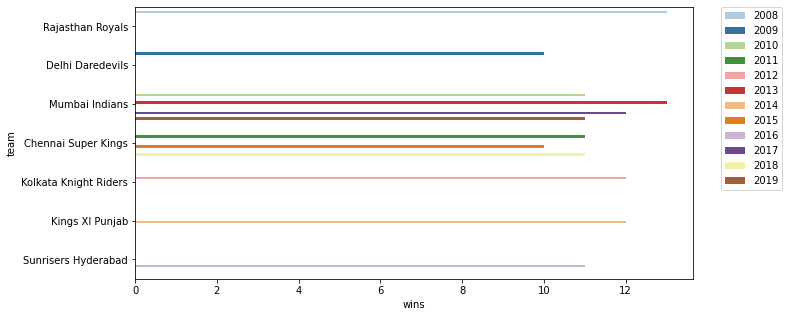

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot('wins', 'team', hue='year', data=wins_per_season, palette='Paired');
plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
plt.show()

Observation: Mumbai Indians have secured most wins in 4 seasons:- 2010,2013,2017,2019 as so are the best team , followed by Chennai Super kings

##**Analysing Most successful team wrt number of matches won**

In [ ]:
#Analysing Most successful team wrt number of matches won
team = df2['winner'].value_counts(ascending=False)
team.reset_index()

,index,winner
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


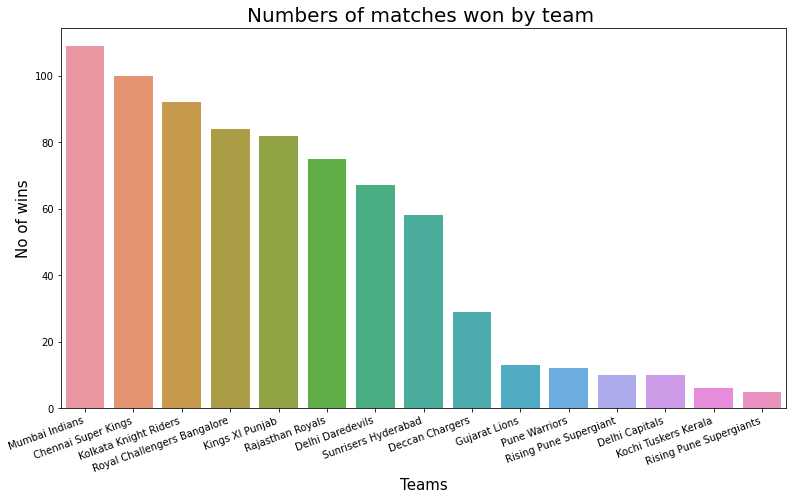

In [ ]:
#Plotting data for most successful team wrt number of matches won
plt.figure(figsize = (13,7))
sns.countplot(x='winner',data=df2,order=team.index)
plt.title("Numbers of matches won by team ",fontsize=20)
plt.xticks(rotation=20, horizontalalignment="right")
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

Observation: Maximum matches are won by Mumbai Indians followed by Chennai Super kings then Kolkata knight Riders

###**Toss Decisions across Seasons**

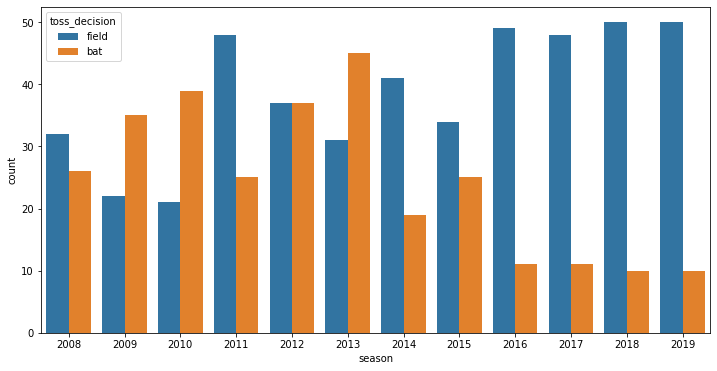

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='season',hue='toss_decision',data=df2)
plt.show()

Observation:The decision for batting or fielding varies largely across the seasons. In some seasons 2009,2010,2013 toss winners opted for batting. But, after 2013 the majority of toss winners opted for fielding



##**Maximum Toss Winners across all seasons**

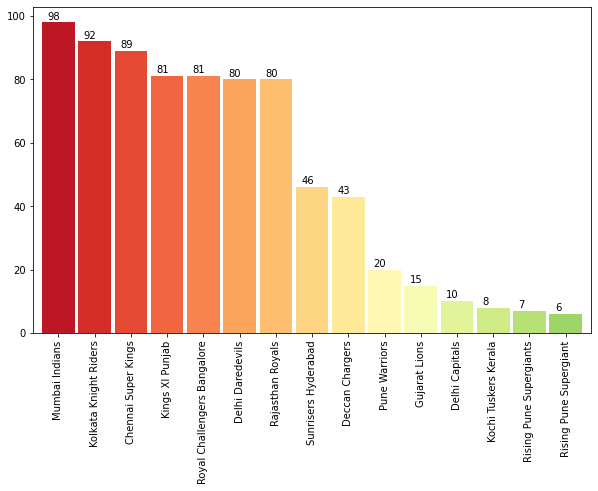

In [ ]:
plt.subplots(figsize=(10,6))
ax=df2['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

Observation-Mumbai Indians seem to be very lucky having the higest win in tosses follwed by Kolkata Knight Riders. Pune Supergiants have the lowest wins.


In [ ]:
df=df2[df2['toss_winner']==df2['winner']]
df.shape

(393, 17)

In [ ]:
df=df2[df2['toss_winner']!=df2['winner']]
df.shape

(363, 17)

###**Analysing Number of times toss winner is also the match winner**

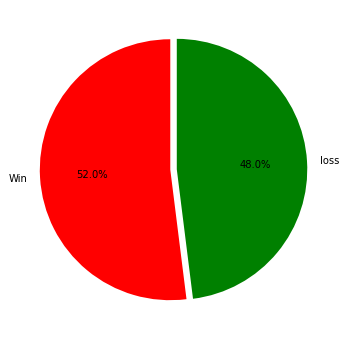

In [ ]:
df3=df2[df2['toss_winner']==df2['winner']]
df4=df2[df2['toss_winner']!=df2['winner']]
slices=[len(df3),len(df4)]
labels=['Win','loss']
plt.pie(slices,labels=labels,startangle=90,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()


Observation:Toss winner is not necessarily the match winner. The match winning probability for toss winning team is about 50%-50%



###**Analying top 10 player who won max man of the match awards**

In [ ]:
player=df2['player_of_match'].value_counts()[:10]
print(player)

CH Gayle          21
AB de Villiers    20
RG Sharma         17
DA Warner         17
MS Dhoni          17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64


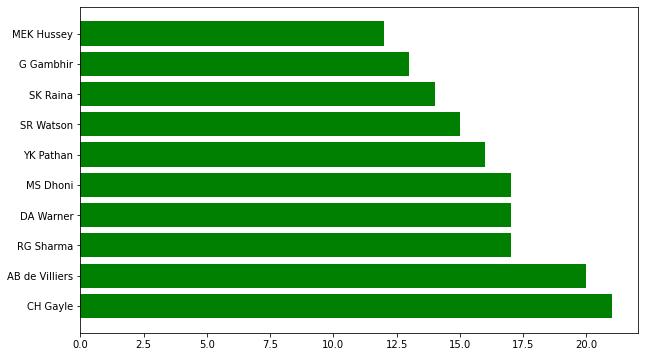

In [ ]:
#plotting the above data
plt.figure(figsize=(10,6))
plt.barh(player.index,player.values,color='g')
plt.show()


Observation - Maximun Man of the Match awards are won by CH Gale, followed by AD de Villiers, DA Warner, MS Doni, RG sharma. These are preffered players for endorsement of products

##**Analysis on Batsmen**

###**Top 10 batsmen in terms of total runs scored**

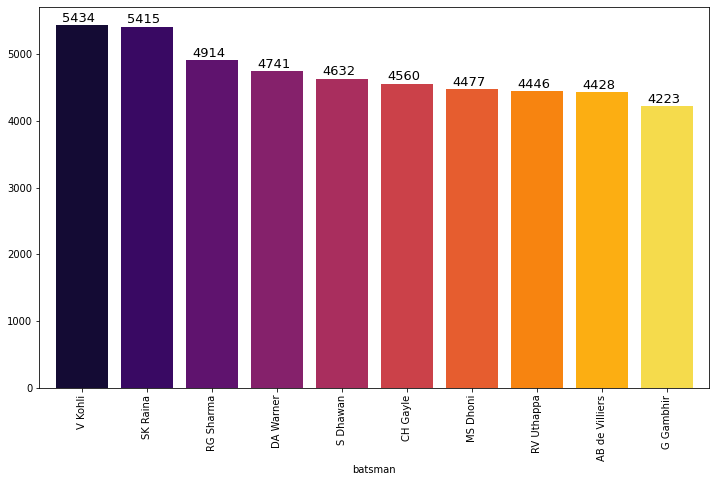

In [ ]:
#Top 10 Batsmen
plt.subplots(figsize=(12,7))
max_runs=df1.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('inferno',10))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=13)
plt.show()

Observation : Top 3 batsmen in terms of runs scored is virat Kohli followed by Suresh Raina and Rohit sharma

In [ ]:
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
complete_data = df2[['id','season','winner']].merge(df1, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
complete_data.head()

,season,winner,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2017,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2017,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,2017,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2017,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


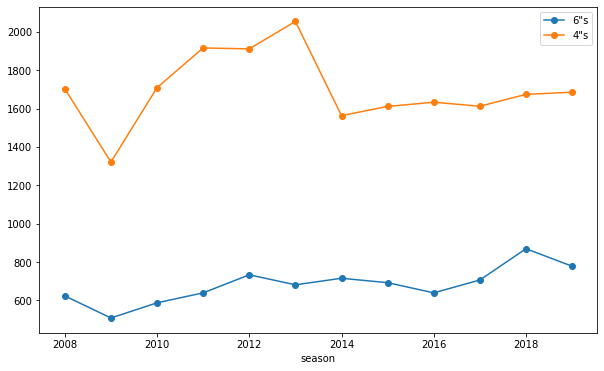

In [ ]:
#Analysing Sixes and Fours across season
six_b=complete_data.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
four_a=complete_data.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
new_data=six_b.merge(four_a,left_on='season',right_on='season',how='left')
new_data=new_data.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
new_data.set_index('season')[['6"s','4"s']].plot(marker='o')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()



Observation: number of Sixes are less then Fours hit by players across season

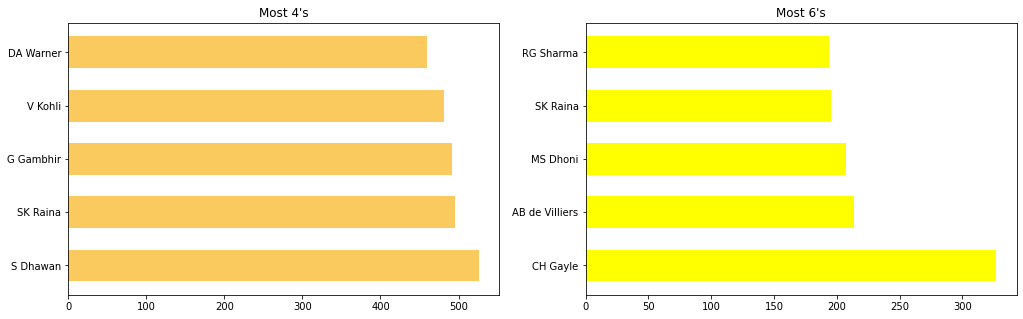

In [ ]:
#Top 5 Batsman’s with  4’s,6's
toppers=df1.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
toppers=toppers.pivot('batsman','batsman_runs','total_runs')
fig,ax=plt.subplots(1,2,figsize=(17,5))
toppers[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0],color='#fbca5f',width=0.6)
ax[0].set_title("Most 4's")
ax[0].set_ylabel('')
toppers[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1],color='#ffff00',width=0.6)
ax[1].set_title("Most 6's")
ax[1].set_ylabel('')
plt.show()

Observation
*   Dhawan has the maximum 4’s.
*   C Gayle has the maximum 6’s and he leads by a big margin.


In [ ]:
#Top individual scores
top_scores = df1.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
top_scores.sort_values('batsman_runs', ascending=0).head(10)

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,Royal Challengers Bangalore,175
900,60,BB McCullum,Kolkata Knight Riders,158
8426,562,AB de Villiers,Royal Challengers Bangalore,133
10149,7935,RR Pant,Delhi Daredevils,130
9257,620,AB de Villiers,Royal Challengers Bangalore,129
5585,372,CH Gayle,Royal Challengers Bangalore,128
3135,206,M Vijay,Chennai Super Kings,127
529,36,DA Warner,Sunrisers Hyderabad,126
7752,516,V Sehwag,Kings XI Punjab,122
10417,7953,SR Watson,Chennai Super Kings,121


Observation: We can see Gayle leads the table. Not only Gayle but there are many RCB players on the top scores list. Looks like RCB is a very formidable batting side.

##**Analysis On Bowlers**

###**Top 10 wicket takers**

In [ ]:
wickets=df1[df1['dismissal_kind'].isin(['caught', 'bowled',  'lbw', 'caught and bowled','stumped', 'hit wicket'])]
bowlers=wickets.groupby("bowler")["dismissal_kind"].count().sort_values(ascending=False).head(10)
bowlers

bowler
SL Malinga         170
A Mishra           156
Harbhajan Singh    150
PP Chawla          149
DJ Bravo           147
B Kumar            133
R Ashwin           125
SP Narine          122
UT Yadav           119
RA Jadeja          108
Name: dismissal_kind, dtype: int64

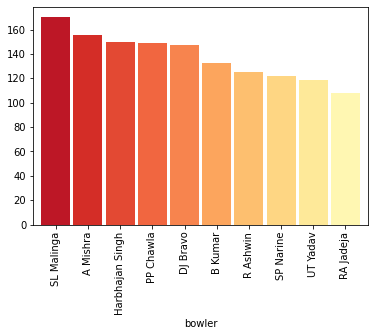

In [ ]:
bowlers.plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20),)

Observation:- Top wicket taker in IPL is SL Malinga

###**Most Economical Bowlers with 300+ overs**



In [ ]:
eco=df1.groupby(['bowler']).sum()
eco['total balls']=df1['bowler'].value_counts()
eco['overs']=(eco['total balls']//6)
eco['economy']=(eco['total_runs']/(eco['overs']))
eco[(eco['overs']>300)].sort_values('economy')[:10].economy.reset_index()

,bowler,economy
0,DW Steyn,6.686649
1,R Ashwin,6.754980
2,SP Narine,6.787529
3,Harbhajan Singh,7.043478
4,SL Malinga,7.092929
5,B Kumar,7.237251
6,A Mishra,7.291667
7,PP Ojha,7.404321
8,Z Khan,7.546174
9,P Kumar,7.612756


Observation: Bowler with the best economy is DW Steyn followed by R Ashwin and SP Narine